波士顿房价这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋13种特征的信息。

CRIM：城镇人均犯罪率<br>
ZN：住宅用地所占比例<br>
INDUS：城镇中非商业用地所占比例<br>
NOX：环保指标<br>
RM：每栋住宅的房间数<br>
AGE：1940年以前建成的自住单位比例<br>
DIS：距离五个波士顿就业中心的加权距离<br>
RAD：距离高速公路的便利指数<br>
TAX：每一万美元的不动产税率<br>
PTRATIO：城镇中教师学生比例<br>
B：城镇中黑人比例<br>
LSTAT：地区中房东属于低收入阶层的比例<br>
MEDV：自住房屋房价的中位数<br>

### 导入和划分数据集

In [1]:
# 波士顿房价数据  
from sklearn.datasets import load_boston  

boston = load_boston()  
X = boston.data  
y = boston.target 

print (X.shape)
print (y.shape)
print (X[0:1,:])

(506, 13)
(506,)
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]]


In [2]:
# 划分数据集 
from sklearn.cross_validation import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)  

#数据标准化  
from sklearn import preprocessing  
standard_X = preprocessing.StandardScaler()  
X_train = standard_X.fit_transform(X_train)  
X_test = standard_X.transform(X_test)  
  
standard_y = preprocessing.StandardScaler()  
y_train = standard_y.fit_transform(y_train.reshape(-1, 1))  
y_test = standard_y.transform(y_test.reshape(-1, 1))  

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 使用普通线性回归模型

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

lasso.fit(X_train,y_train.ravel())  
lasso_score = lasso.score(X_test,y_test.ravel())  
print ('lasso模型得分：',lasso_score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("MSE: %.4f" %(mse/2.0))

lasso模型得分： 0.550364451033
MSE: 0.2216


In [4]:
from sklearn.linear_model import ElasticNet
ElasticNet_clf = ElasticNet(alpha=0.1, l1_ratio=0.7)

ElasticNet_clf.fit(X_train,y_train.ravel())  
ElasticNet_clf_score = ElasticNet_clf.score(X_test,y_test.ravel())  
print ('ElasticNet模型得分：',ElasticNet_clf_score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ElasticNet_clf.predict(X_test))
print("MSE: %.4f" %(mse/2.0))

ElasticNet模型得分： 0.548368757443
MSE: 0.2226


### 使用GBRT做对比

In [5]:
from sklearn import ensemble
params = {'n_estimators':40, 'max_depth':6, 'min_samples_split':2, 'min_samples_leaf':14, 'learning_rate':0.1, 'loss':'ls'}
GBRT_clf = ensemble.GradientBoostingRegressor(**params)

GBRT_clf.fit(X_train,y_train.ravel())  
GBRT_clf_score = GBRT_clf.score(X_test,y_test.ravel())  
print ('GBRT模型得分：',GBRT_clf_score)

from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, GBRT_clf.predict(X_test))
print("MSE: %.4f" %(mse/2.0))

GBRT模型得分： 0.748768145201
MSE: 0.1413


### 可视化结果

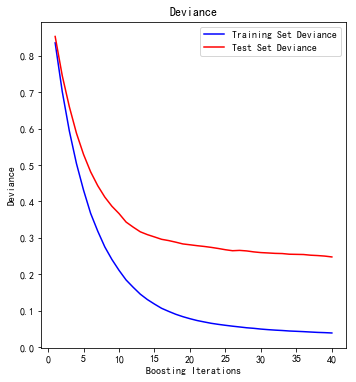

In [6]:
# Plot training deviance
import numpy as np
import matplotlib.pyplot as plt

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
y_pred = GBRT_clf.predict(X_test)

for i, y_pred in enumerate(GBRT_clf.staged_predict(X_test)):
    test_score[i] = GBRT_clf.loss_(y_test.ravel(), y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators'])+1, GBRT_clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators'])+1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

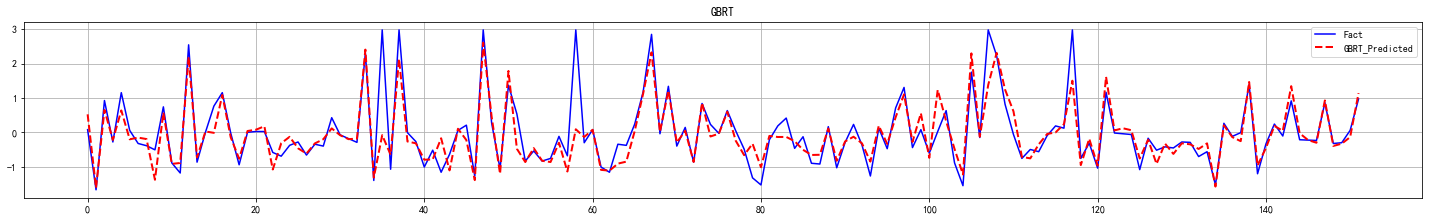

In [7]:
# 画图1
import matplotlib.pyplot as plt  
  
fig = plt.figure(figsize=(20, 3))
axes = fig.add_subplot(1, 1, 1) 

line1, = axes.plot(range(len(y_test)), y_test, 'b',label='Fact')  

GBRT_clf_result = GBRT_clf.predict(X_test) 
line2, = axes.plot(range(len(GBRT_clf_result)),GBRT_clf_result,'r--',label='GBRT_Predicted',linewidth=2)  

axes.grid()  
fig.tight_layout()  

plt.legend(handles=[line1,line2])  
plt.title('GBRT')  
plt.show()  

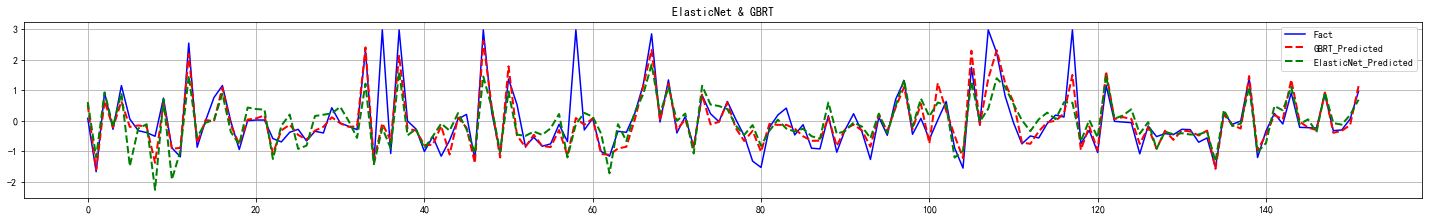

In [8]:
# 画图2
import matplotlib.pyplot as plt  
  
fig = plt.figure(figsize=(20, 3))
axes = fig.add_subplot(1, 1, 1) 

line1, = axes.plot(range(len(y_test)), y_test, 'b',label='Fact')  

GBRT_clf_result = GBRT_clf.predict(X_test) 
line2, = axes.plot(range(len(GBRT_clf_result)),GBRT_clf_result,'r--',label='GBRT_Predicted',linewidth=2)  

ElasticNet_clf_result = ElasticNet_clf.predict(X_test) 
line3,=axes.plot(range(len(ElasticNet_clf_result)), ElasticNet_clf_result, 'g--',label='ElasticNet_Predicted',linewidth=2)  

axes.grid()  
fig.tight_layout()  

plt.legend(handles=[line1,line2,line3])  
plt.title('ElasticNet & GBRT')  
plt.show()  